<a href="https://colab.research.google.com/github/smitjiwani/reinforcement-learning/blob/main/rl3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def value_iteration(states, actions, transition_model, reward_function, gamma, epsilon):
    V = {s: 0 for s in states}

    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = max(sum(transition_model(s, a, s_next) *
                           (reward_function(s, a, s_next) + gamma * V[s_next])
                           for s_next in states) for a in actions)
            delta = max(delta, abs(v - V[s]))
        if delta < epsilon:
            break
    policy = {}
    for s in states:
        policy[s] = max(actions, key=lambda a: sum(
            transition_model(s, a, s_next) *
             (reward_function( s, a, s_next) + gamma * V[s_next])
             for s_next in states
            ))
    return policy, V

In [ ]:
import pandas as pd
import numpy as np
grid_size = (4,4)
states = [(i,j) for i in range(grid_size[0]) for j in range(grid_size[1])]
actions = ["up", "down", "left" , "right"]

In [ ]:
states

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

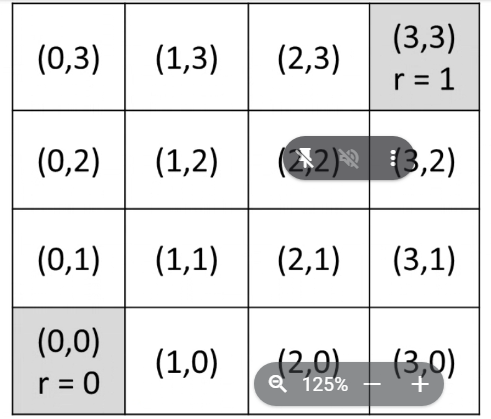

In [ ]:
# define rewards and terminal states
rewards = {(0,0): 0, (3,3):1}
terminal_state= [(0,0), (3,3)]

In [ ]:
# Transition Probablities
def transition(state, action):
  if state in terminal_state:
    return {state: 1.0}

  i,j =state

  if action == "up":
    next_state = (max(i-1,0), j)
  elif action == "down":
    next_state = (min(i+1, grid_size[0]-1), j)
  elif action == "left":
    next_state = (i, max(j-1,0))
  elif action == "right":
    next_state = (i, min(j+1, grid_size[1]-1))

  return {next_state: 1.0}

### Bellman Equation for Value update

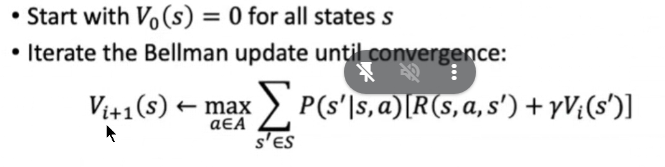

In [ ]:

# policy Iteration Algorithm
def policy_iteration(states, actions, gamma=0.9, theta=1e-6):
    policy = {s: np.random.choice(actions) for s in states if s not in terminal_state}
    V = {s: 0 for s in states}

    while True:
        while True:
            delta = 0
            for s in states:
                if s in terminal_state:
                    continue
                v = V[s]
                a = policy[s]
                next_states = transition(s, a)
                V[s] = sum(prob * (rewards.get(ns, 0) + gamma * V[ns])
                           for ns, prob in next_states.items())
                delta = max(delta, abs(v - V[s]))
            if delta < theta:
                break

        policy_stable = True
        for s in states:
            if s in terminal_state:
                continue

            old_action = policy[s]
            action_values = {}
            for a in actions:
                next_states = transition(s, a)
                action_values[a] = sum(prob * (rewards.get(ns, 0) + gamma * V[ns])
                                       for ns, prob in next_states.items())

            best_action = max(action_values, key=action_values.get)
            policy[s] = best_action

            if old_action != best_action:
                policy_stable = False

        if policy_stable:
            break

    return policy, V

In [ ]:
# Run Policy Iteration
policy, V = policy_iteration(states, actions)

# Display Results
print("Optimal Policy:")
for i in range(grid_size[0]):
    print([policy.get((i, j), "-") for j in range(grid_size[1])])

Optimal Policy:
['-', 'down', 'down', 'down']
['down', 'down', 'down', 'down']
['down', 'down', 'down', 'down']
['right', 'right', 'right', '-']


In [ ]:
# Print State Values:

print("Optimal State Values:")
for i in range(grid_size[0]):
  print([round(V.get((i, j), 0), 2) for j in range(grid_size[1])])

Optimal State Values:
[0, 0.66, 0.73, 0.81]
[0.66, 0.73, 0.81, 0.9]
[0.73, 0.81, 0.9, 1.0]
[0.81, 0.9, 1.0, 0]
